In [879]:
from operator import itemgetter
import random
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

In [880]:
data = [1.046964545,1.429028479,1.009788026,1.065635784,1.322817971,1.192413123,1.024090586,1.552231786,1.181007833,1.144235807,8.107825696,8.248531412,5.859392017,7.47826408,5.745442064,6.721629956,6.746805726,7.399141709,5.143286202,7.741684642,22.51409443,17.81432562,25.72455687,18.74525697,16.3095995,16.059397,18.03385569,15.34862874,16.31571101,22.61980418]

In [902]:
def plot_regression(x, y):
    
    plt.axis('equal')
    plt.scatter(x, y, c='black')
    plt.grid(True)


    plt.show()

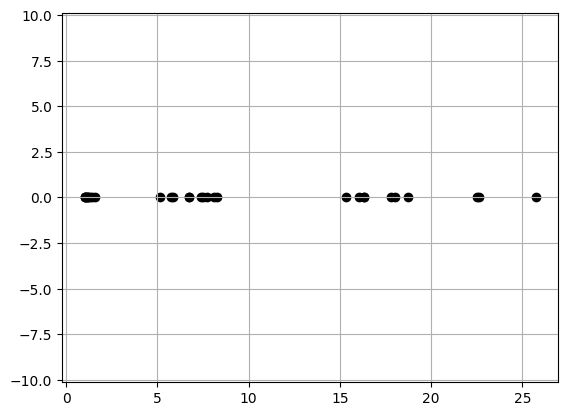

In [903]:
plot_regression(x=data, y=[0]*len(data))

Define how many clusters, K, we want.

In [883]:
K = 3

Randomly select 3 centroids from the data to begin calculating data distances and assign preliminary clusters.

In [884]:
pop_data = deepcopy(data)
start_cluster_centroids = [pop_data.pop(random.randrange(len(pop_data))) for i in range(K)]

Assign data to clusters based on the centroids they're closest to.

In [885]:
def get_clusters(cluster_centroids):

    clusters = {key:[] for key in cluster_centroids}
    for data_val in data:


        centroid_distances=dict()
        for centroid in clusters.keys():

            distance = abs(centroid-data_val)
            centroid_distances[centroid]=distance


        min_distance = min(centroid_distances.values())
        for centroid_key, distance_val in centroid_distances.items():
            if distance_val == min_distance:
                clusters[centroid_key].append(data_val)

    return clusters

In [886]:
clusters = get_clusters(cluster_centroids=start_cluster_centroids)

Calculate the variance in the clustered data to measure the dispersion of the data points from the mean.  Lower variance indicates that the data points are generally similar and do not vary widely from the mean.  Conversely, higher variance indicates that the values vary more widely from the mean.

Variance can also be called the 'cluster interia'.

variance = sum((data_values_in_cluster - centroid)^2) / number_of_values_in_cluster

In [887]:
#  AKA cluster inertia
def get_cluster_variances(clusters):

    cluster_variances = dict()
    for centroid_key, cluster_vals in clusters.items():

        diff_sq = [(val-centroid_key)**2 for val in cluster_vals]
        variance = sum(diff_sq)/(len(cluster_vals))

        cluster_variances[centroid_key]=float(variance)

    return cluster_variances

In [888]:
cluster_variance = get_cluster_variances(clusters=clusters)
print(cluster_variance)

{1.192413123: 0.030382504077948413, 25.72455687: 31.729304751230497, 7.741684642: 20.775763539715115}


Once all the data is grouped into their clusters, calculate the average of the data within each cluster.  

In [889]:
def update_centroids(clusters):

    new_centroids = []
    for centroid_key, cluster_vals in clusters.items():
        cluster_avg = np.mean(cluster_vals)

        new_centroids.append(float(cluster_avg))

    return new_centroids

In [890]:
new_centroids = update_centroids(clusters=clusters)

These averages are the new centroids around which the data will be clustered.  This process is iterated until the centroids are no longer changing significantly.

Iteration 2

In [891]:
clusters = get_clusters(cluster_centroids=new_centroids)
cluster_variance = get_cluster_variances(clusters=clusters)
new_centroids = update_centroids(clusters=clusters)

Iteration 3

In [892]:
clusters = get_clusters(cluster_centroids=new_centroids)
cluster_variance = get_cluster_variances(clusters=clusters)
new_centroids = update_centroids(clusters=clusters)

Iteration 4

In [893]:
clusters = get_clusters(cluster_centroids=new_centroids)
cluster_variance = get_cluster_variances(clusters=clusters)
new_centroids = update_centroids(clusters=clusters)

Iteration 5

In [894]:
clusters = get_clusters(cluster_centroids=new_centroids)
cluster_variance = get_cluster_variances(clusters=clusters)
new_centroids = update_centroids(clusters=clusters)

Plot the clusters to visualize how the data was grouped.

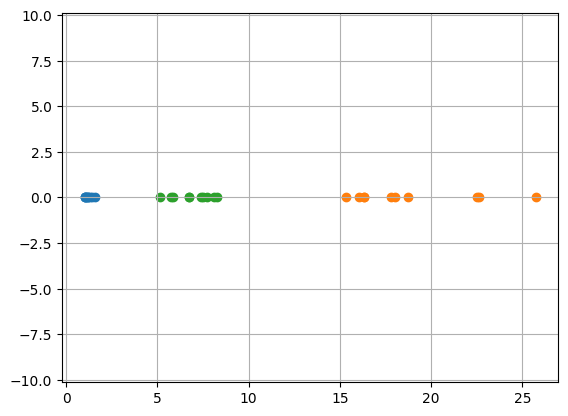

In [895]:
for centroiud_key, cluster_vals in clusters.items():

    plt.axis('equal')
    plt.scatter(x=cluster_vals, y=[0]*len(cluster_vals))
    plt.grid(True)

plt.show()

-----

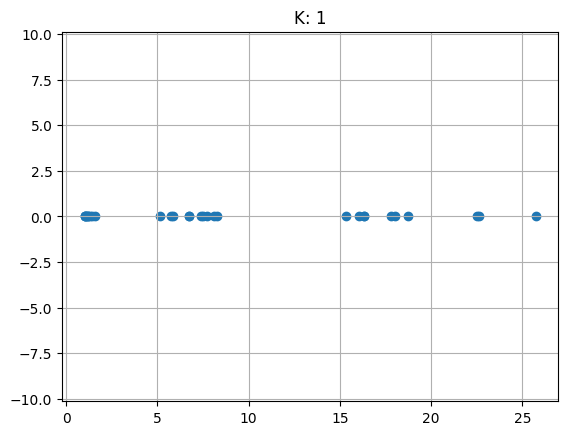

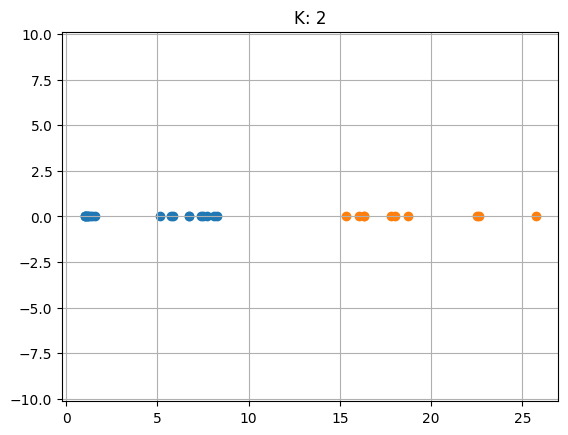

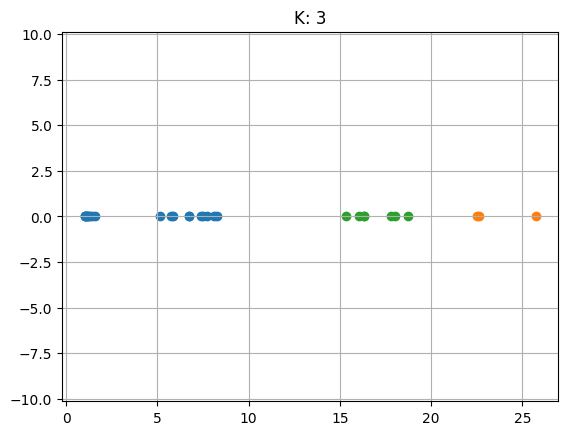

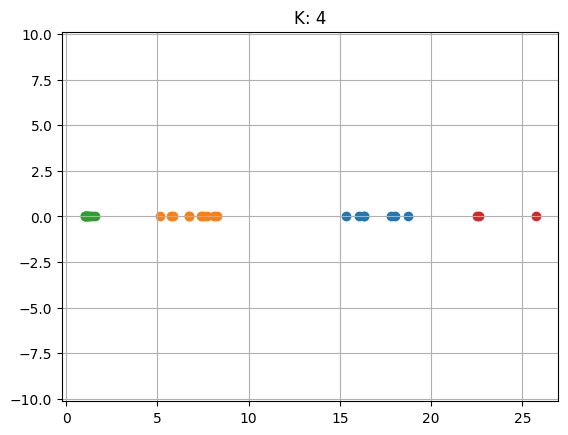

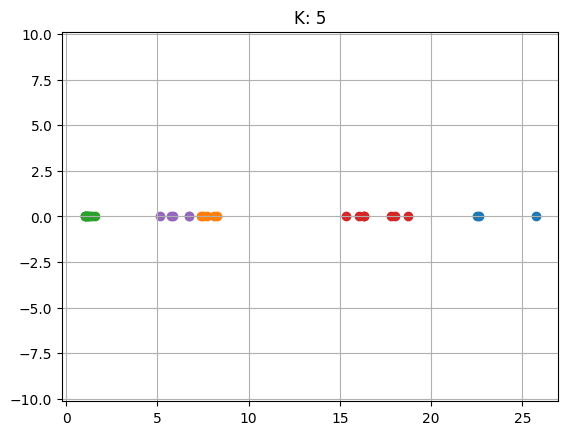

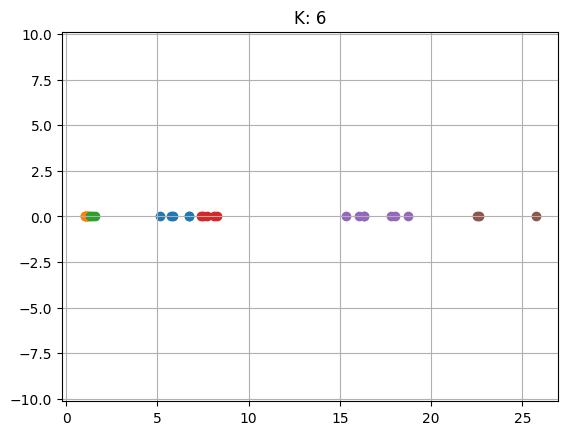

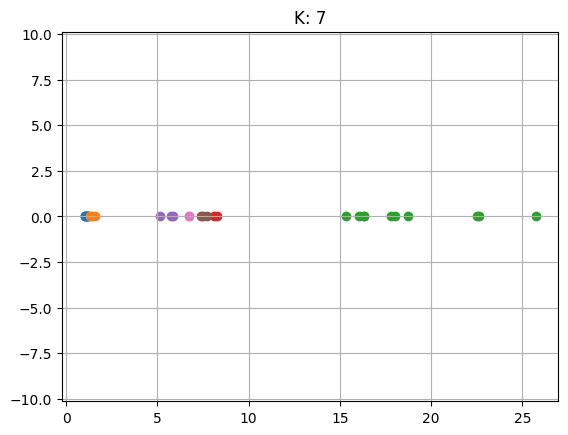

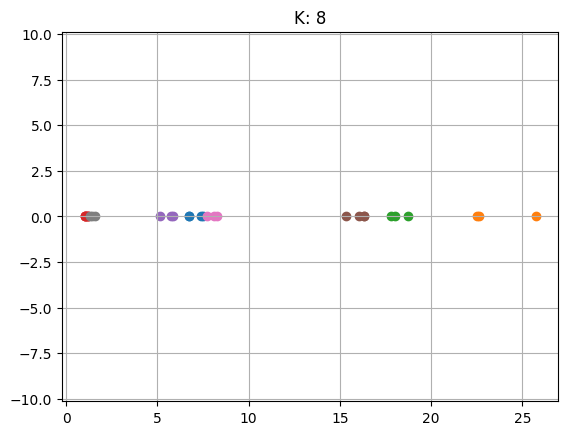

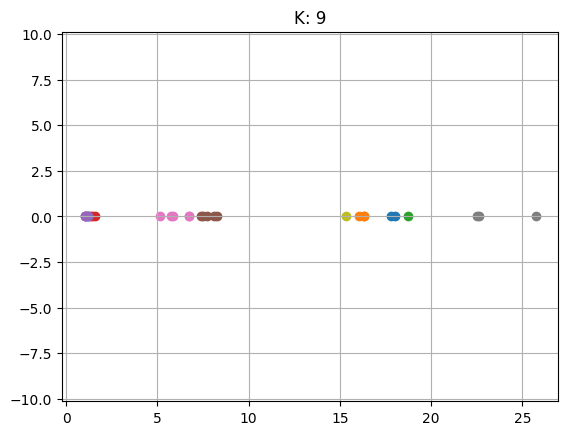

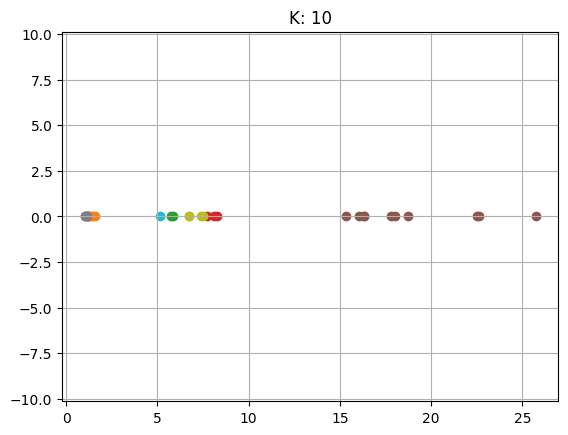

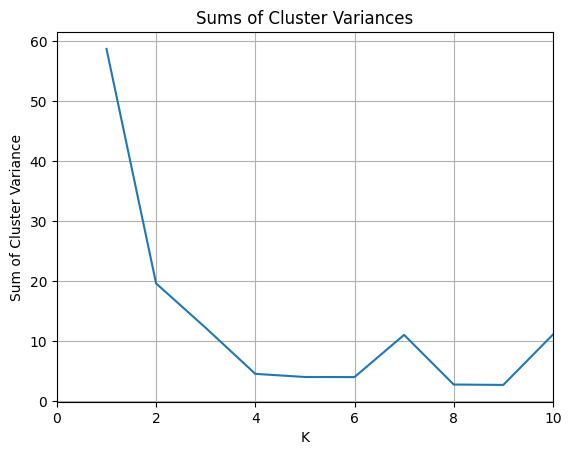

In [901]:
#  define how up to how many clusters we want to test
K_max=10


sum_variance = []  # this variable is going to store the sum of cluster variance across all cluster counts, K
for K in range(1, K_max+1):

    pop_data = deepcopy(data)
    start_cluster_centroids = [pop_data.pop(random.randrange(len(pop_data))) for i in range(K)]

    clusters = get_clusters(cluster_centroids=start_cluster_centroids)
    cluster_variance = get_cluster_variances(clusters=clusters)
    new_centroids = update_centroids(clusters=clusters)


    #  define how many times we want the algorithm to calculate cluster centroids and converge data to a cluster
    for cluster_iteration in range(10):
        
        clusters = get_clusters(cluster_centroids=new_centroids)
        cluster_variance = get_cluster_variances(clusters=clusters)
        new_centroids = update_centroids(clusters=clusters)


    #  store the sum of cluster variance across all cluster counts, K
    sum_variance.append((K, sum(cluster_variance.values())))


    #  plot clustered data
    fig1, ax1 = plt.subplots()
    for centroiud_key, cluster_vals in clusters.items():

        ax1.axis('equal')
        ax1.scatter(x=cluster_vals, y=[0]*len(cluster_vals))
        ax1.grid(True)
        ax1.set_title(f'K: {K}')

    plt.show()



#  plot sum of cluster data variance
fig2, ax2 = plt.subplots()

k_vals = list(map(itemgetter(0), sum_variance))
varaince_vals = list(map(itemgetter(1), sum_variance))

ax2.plot(k_vals, varaince_vals)
ax2.set_xlim(0, K_max)
ax2.grid(True)
ax2.set_title('Sums of Cluster Variances')
ax2.set_xlabel('K')
ax2.set_ylabel('Sum of Cluster Variance')

plt.show()




Looking at the Sum of Cluster Variances plot, we want to identify the 'elbow' in the data.  This elbow indicates the ideal number of cluster, K, for the given data set.

In this case, the elbow occurs between 2 and 4 clusters.

Looking at the plots, we see the most even data distributions for K = 2, K = 3, and K = 4.